# Whole Genome Predictive Analysis for Autism Spectrum Disorder
#### February 6, 2017
##### Ajay Kumar

**Objective** Autism is a complex neurodevelopmental disorder characterized by social communication deficits. The prevalence of Autism has risen year over year and is currently estimated to affect 1 in 68. Increased research interest of late has indicated both a genetic and environmental component. Like the heterogenous nature of the disorder with a myriad of co-morbidities, the genetic etiology is equally complex. Researchers estimate the complete genetic load to be between 600-800 genes, however so far only about 64 genes have shown strong association. Therefore, there is a gap to identify the missing genetic component to help identify potential biomarkers for diagnosis and/or therapeutic targets.

**Background** I published a paper previously using similar data but performing simple hypergeometric enrichment of Gene Ontology categories associated with autism and found other associated genes that expressed a similar pattern. I identified over 1100 additional genes associated with autism and over 40% of those have been validated so far. I plan on performing a similar analysis using modern methods.
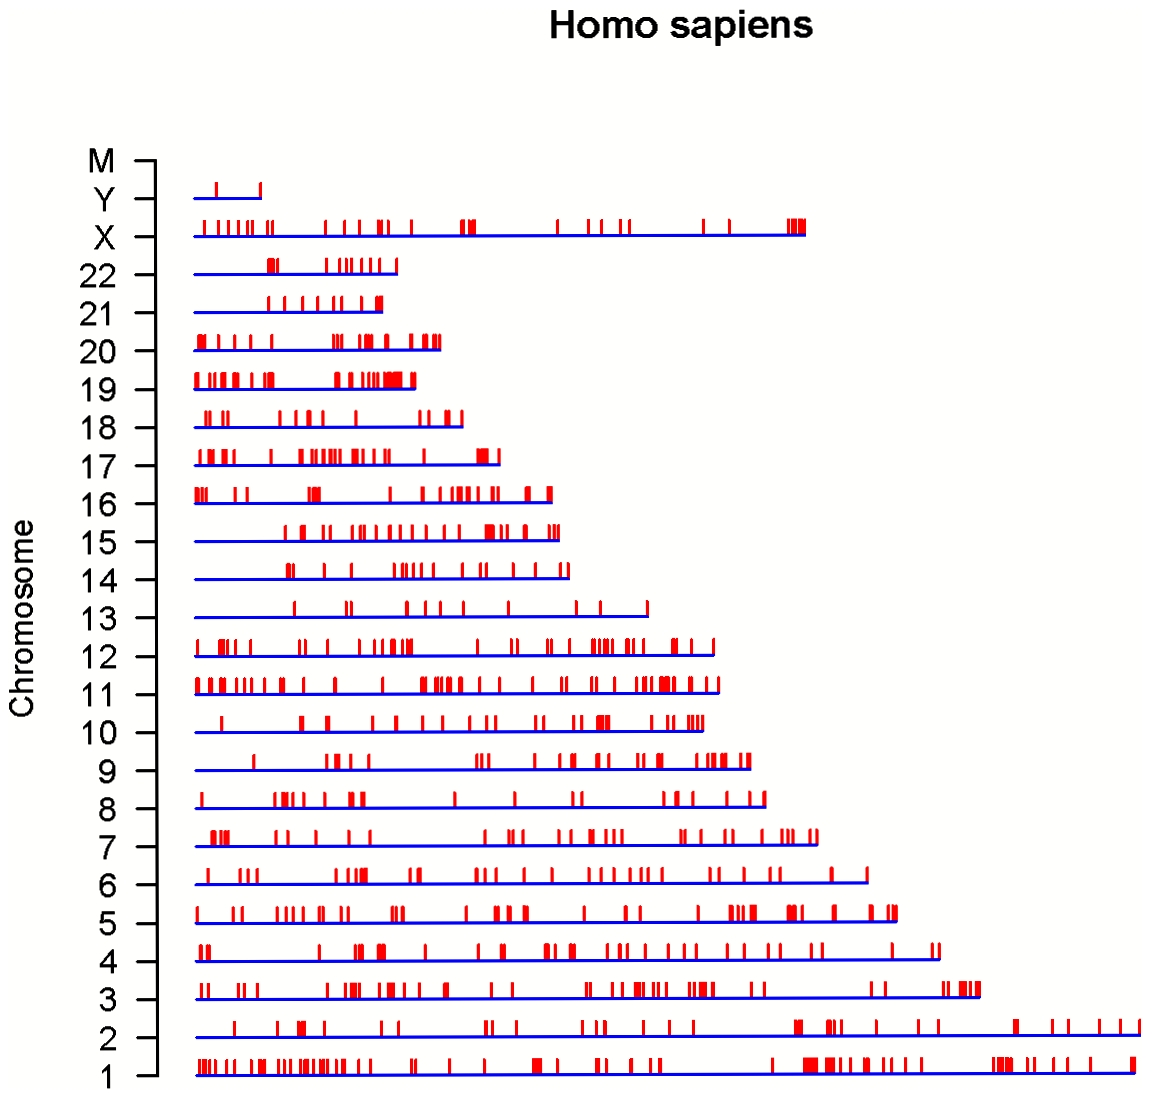
(Kumar et al., 2011, PLoS One)

**Approach** 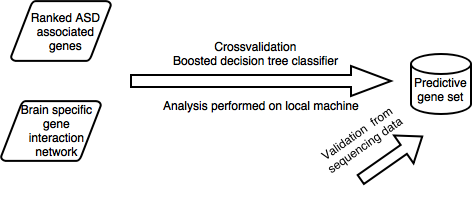

**Datasets** I obtained the list of genes associated with Autism from [SFARI Gene](gene.sfari.org). This resource not only includes strong associations but associations of varying strengths (Ranks 1 through 6), all of which have been annotated manually. For other disease associated gene lists, I obtained those from [DisGeNET](http://www.disgenet.org/web/DisGeNET/menu/downloads) as controls. I next obtained functional interaction relationship scores for all pairs within 25,825 genes in the human genome from [GIANT](giant.princeton.edu). I also recently applied and was granted access to the [MSSNG](research.mss.ng) database from Autism Speaks that provides whole genome sequencing data for 8000 individuals with autism. I also have access to the Broad Institute's [ExAc](http://exac.broadinstitute.org) database which provides whole exome sequencing data from non-clinical population. Finally, I've also identified a database to find drug targets for gene variants identified in a greater proportion in autism population compared to normal population at the [PharmKGB](https://www.pharmgkb.org/downloads) database.

### Experiment 1: Selection of control dataset

The heterogenous nature of autism with several comorobidities makes it a challenge to define a control disease to create a good classifier that can identify gene interaction networks that define autism associated genes. I selected a total of 4 diseases that spanned the spectrum. 3 were neurological, 1 was not brain specific. Two of the neurological diseases (Alzheimers & Parkinsons) are neurodegenerative diseases, meaning they occurred later in life. There is a great overlap in the genetic etiology of Autism & Parkinsons, which should make distinguishing difficult. For this, I only used the strongly associated autism genes.

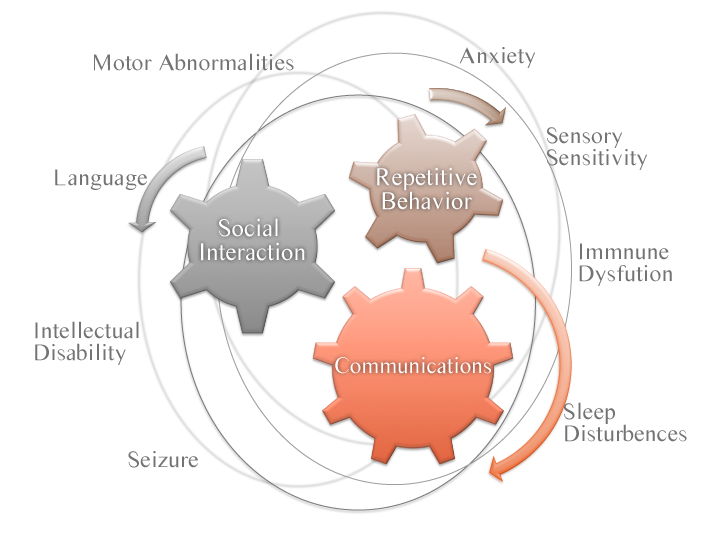

('Alzheimers Size:', (366, 25826))
('Diabetes Size:', (256, 25826))
('Schizphrenia Size:', (290, 25826))
('Parkinsons Size:', (202, 25826))
('Alzheimers Dataset:', 0.458033033033033)
('Diabetes Dataset:', 0.47046153846153854)
('Schizophrenia Dataset:', 0.65172413793103445)
('Parkinsons Dataset:', 0.44547619047619047)


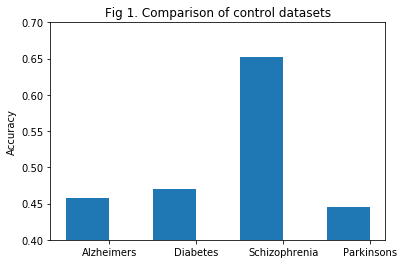

In [2]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn import svm
import matplotlib.pyplot as plt

# Load the dataset
data1 = np.genfromtxt("sf_score_alz.csv",delimiter=",")
print("Alzheimers Size:",data1.shape)
data2 = np.genfromtxt("sf_score_diabetes.csv",delimiter=",")
print("Diabetes Size:",data2.shape)
data3 = np.genfromtxt("sf_score_scz.csv",delimiter=",")
print("Schizphrenia Size:",data3.shape)
data4 = np.genfromtxt("sf_score_park.csv",delimiter=",")
print("Parkinsons Size:",data4.shape)
# Create the features matrix
X1 = data1[:,1:-1]
X2 = data2[:,1:-1]
X3 = data3[:,1:-1]
X4 = data4[:,1:-1]
# Create the target vector
y1 = data1[:,0]
y2 = data2[:,0]
y3 = data3[:,0]
y4 = data4[:,0]
# Create SVM
svm = svm.SVC(class_weight="balanced")
# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)
# Do k-Fold cross-validation
cv_results1 = cross_val_score(svm,
                             X1,
                             y1,
                             cv=kf,
                             scoring="accuracy",
                             n_jobs=-1)
cv_results2 = cross_val_score(svm,
                             X2,
                             y2,
                             cv=kf,
                             scoring="accuracy",
                             n_jobs=-1)
cv_results3 = cross_val_score(svm,
                             X3,
                             y3,
                             cv=kf,
                             scoring="accuracy",
                             n_jobs=-1)
cv_results4 = cross_val_score(svm,
                             X4,
                             y4,
                             cv=kf,
                             scoring="accuracy",
                             n_jobs=-1)
# Print scores for datasets
print("Alzheimers Dataset:",cv_results1.mean())
print("Diabetes Dataset:",cv_results2.mean())
print("Schizophrenia Dataset:",cv_results3.mean())
print("Parkinsons Dataset:",cv_results4.mean())

# Plot scores
ind = np.arange(1,5,1)
a = cv_results1.mean()
b = cv_results2.mean()
c = cv_results3.mean()
d = cv_results4.mean()
means = (a,b,c,d)
width = 0.5
fig, ax = plt.subplots()
rects1 = ax.bar(ind, means,width)
# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy')
ax.set_ylim((0.4,0.7))
ax.set_title('Fig 1. Comparison of control datasets')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Alzheimers', 'Diabetes', 'Schizophrenia', 'Parkinsons'))
plt.show()

**Conclusion**: The Schizophrenia dataset combined with the strongly associated autism genes had the highest accuracy 
for the binary classification problem

### Experiment 2: Contribution of additional ranks of autism associated genes

The SFARI Gene data resource not only includes the strongly associated genes, but also includes genes with weaker evidence. I wanted to ask if this additional information would help increase the accuracy of the classifier. The SFARI Gene resource ranks range from 1 through 6 with varying numbers of genes within each specific rank. I decided to group the entries to ensure the sizes were not wildly different into High Evidence, Mid Evidence, and Low Evidence categories.

('Top:', (312, 25826))
('Top+Medium:', (503, 25826))
('Top+Low:', (707, 25826))
('All:', (898, 25826))
('Top Dataset:', 0.74697580645161299)
('Top+Medium Dataset:', 0.53650980392156866)
('Top+Low Dataset:', 0.67048289738430589)
('All Dataset:', 0.74054931335830221)


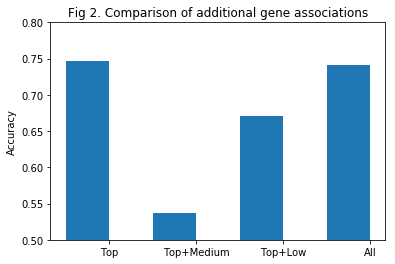

In [8]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn import svm
import matplotlib.pyplot as plt

# Load the dataset
data1 = np.genfromtxt("sf_score_scz.csv",delimiter=",")
print("Top:",data1.shape)
data2 = np.genfromtxt("sf_score_scz_high_med.csv",delimiter=",")
print("Top+Medium:",data2.shape)
data3 = np.genfromtxt("sf_score_scz_high_low.csv",delimiter=",")
print("Top+Low:",data3.shape)
data4 = np.genfromtxt("sf_score_scz_high_med_low.csv",delimiter=",")
print("All:",data4.shape)
# Create the features matrix
X1 = data1[:,1:-1]
X2 = data2[:,1:-1]
X3 = data3[:,1:-1]
X4 = data4[:,1:-1]
# Create the target vector
y1 = data1[:,0]
y2 = data2[:,0]
y3 = data3[:,0]
y4 = data4[:,0]
# Create SVM
svm = svm.SVC()
# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)
# Do k-Fold cross-validation
cv_results1 = cross_val_score(svm,
                             X1,
                             y1,
                             cv=kf,
                             scoring="accuracy",
                             n_jobs=-1)
cv_results2 = cross_val_score(svm,
                             X2,
                             y2,
                             cv=kf,
                             scoring="accuracy",
                             n_jobs=-1)
cv_results3 = cross_val_score(svm,
                             X3,
                             y3,
                             cv=kf,
                             scoring="accuracy",
                             n_jobs=-1)
cv_results4 = cross_val_score(svm,
                             X4,
                             y4,
                             cv=kf,
                             scoring="accuracy",
                             n_jobs=-1)
# Print scores for datasets
print("Top Dataset:",cv_results1.mean())
print("Top+Medium Dataset:",cv_results2.mean())
print("Top+Low Dataset:",cv_results3.mean())
print("All Dataset:",cv_results4.mean())

# Plot scores
ind = np.arange(1,5,1)
a = cv_results1.mean()
b = cv_results2.mean()
c = cv_results3.mean()
d = cv_results4.mean()
means = (a,b,c,d)
width = 0.5
fig, ax = plt.subplots()
rects1 = ax.bar(ind, means,width)
# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy')
ax.set_ylim((0.5,0.8))
ax.set_title('Fig 2. Comparison of additional gene associations')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Top', 'Top+Medium', 'Top+Low', 'All'))
plt.show()

**Conclusions:** Including medium and low association genes alone adds too much noise and results in decreased accuracy. However, the complete data set including all three levels performs similar to just the top genes. This will be the dataset to use moving forward. 

### Experiment 3: Dimensionality Reduction & Model Evaluation

Having established the control dataset as well as the list of autism associated genes, I set out to perform dimensionality reduction using PCA and also evaluate the model by generating a learning curve, validation curve, ROC curve, and scree plot. 

('Original number of features:', 25824)
('Reduced number of features:', 540)


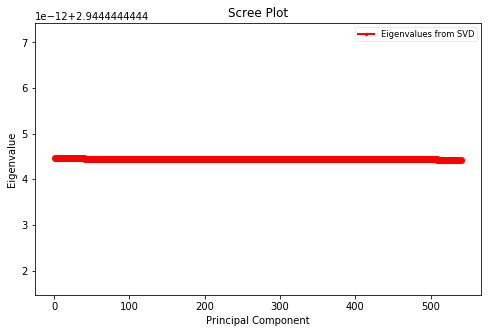

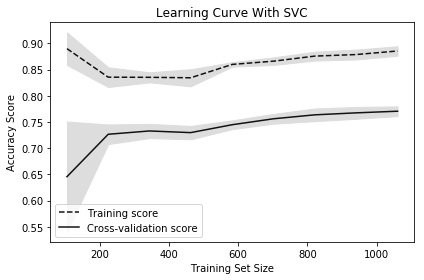

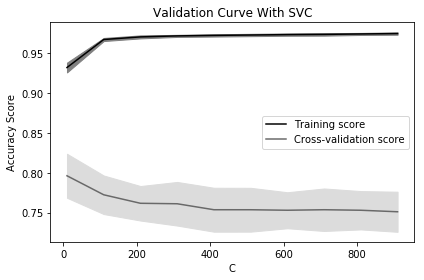

('Best score for data:', 0.7641509433962265)
('Best Kernel:', 'rbf')
('Best Gamma:', 0.01)
('Best C:', 10)
('ROC score:', 0.80616900426509175)


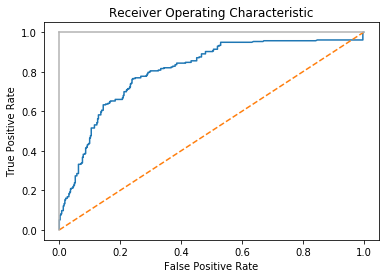

             precision    recall  f1-score   support

        0.0       0.75      0.87      0.81       381
        1.0       0.75      0.57      0.65       256

avg / total       0.75      0.75      0.74       637



In [12]:
#Load libraries
import matplotlib
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, validation_curve, learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Load the dataset
data = np.genfromtxt("sf_score_full.csv",delimiter=",")

# Create the features matrix
X = data[:,1:-1]

# Create a PCA that will retain 99% of the variance
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(X)

# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

A = np.asmatrix(X_pca.T) * np.asmatrix(X_pca)
U, S, V = np.linalg.svd(A) 
eigvals = S**2 / np.cumsum(S)[-1]

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(540) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

# Create the target vector
y = data[:,0]

# Standarize features
#scaler = StandardScaler()
#X_std = scaler.fit_transform(X)

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(svm.SVC(), X_pca, 
                                                        y,
                                                        cv=3,
                                                        scoring='accuracy',
                                                        n_jobs=-1, 
                                                        train_sizes=np.linspace(0.1, 1.0, 9))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve With SVC")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Create range of values for parameter
param_range = np.arange(10,1001,100)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(svm.SVC(), X_pca, y, param_name="C", param_range=param_range, cv=10, scoring="accuracy", n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With SVC")
plt.xlabel("C")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, 
                                                    random_state=0)

# Parameter candidates
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']},
]

# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, 
                   n_jobs=-1)

# Train the classifier on data1's feature and target data
clf.fit(X_train, y_train)

# View the accuracy score
print('Best score for data:', clf.best_score_) 

# View the best parameters for the model found using grid search
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)
print('Best C:',clf.best_estimator_.C)

# Create classifier
clf2 = svm.SVC(C=1, gamma=0.001, kernel='rbf',probability=True)

# Train model and make predictions
y_hat = clf2.fit(X_train, y_train).predict(X_test)

# Get predicted probabilities
y_score = clf2.predict_proba(X_test)[:,1]

# View ROC Score
print("ROC score:",roc_auc_score(y_test, y_score, average="macro"))

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Create a classification report
print(classification_report(y_test, y_hat))

**Conclusions:** 99% of variance could be explained by interaction scores of autism associated genes with a subset of the entire genome highlighting the importance of these networks. Further experiments will evaluate these networks to get meaningful insights. I was able to learn a model with and AUC of 0.80.

### Next Steps
- Apply model to multi-class classification to all ranks*
- Compare additional ML classifiers to estimate performance
- Select best model to make predictions on entire genome
- Validate predictions using sequencing data
- Use variant data on predictions to identify possible drug targets